In [2]:
import matplotlib.pyplot as plt
from Network import *
%matplotlib inline

In [3]:
N = Network([2, 4, 1])
print(N.weights)
#XOR example
X = np.array(([0,0], [0,1], [1,0], [1,1]))
y = np.array(([0], [1], [1], [0]))

[array([[ 1.08582401, -0.92396098,  2.17218774, -2.24476443],
       [-2.71533546, -0.22151377,  0.01044129,  0.54550682]]), array([[ 1.05447833],
       [-1.10089794],
       [-0.6047998 ],
       [-1.9631129 ]])]


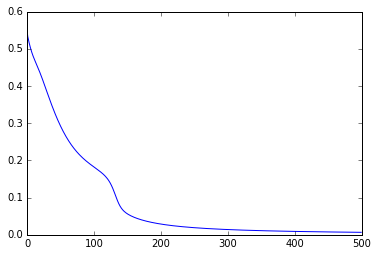

In [4]:
cost = []
it = 500
for i in range(it):   
    cost.append(N.back(X, y, 3))
plt.plot(range(it), cost)

In [5]:
print(N.forward(X))
print(N.weights)

[[ 0.06452354]
 [ 0.93971434]
 [ 0.94164394]
 [ 0.04574183]]
[array([[ 3.32890557, -1.88504693,  6.52836848, -4.86244529],
       [-6.6414911 ,  1.42742586, -3.34174099, -5.66077635]]), array([[  7.55651188],
       [  3.65142525],
       [ -4.91318571],
       [-11.642803  ]])]


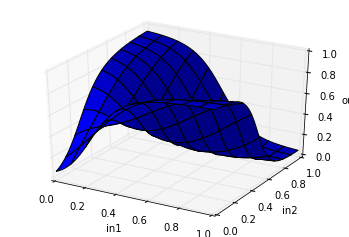

In [6]:
#Test network for various combinations:
in1 = np.linspace(0, 1, 100)
in2 = np.linspace(0, 1, 100)

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(in1, in2)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()


allOutputs = N.forward(allInputs)
yy = np.dot(in1.reshape(100,1), np.ones((1,100)))
xx = np.dot(in1.reshape(100,1), np.ones((1,100))).T

#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, allOutputs.reshape(100, 100))

ax.set_xlabel('in1')
ax.set_ylabel('in2')
ax.set_zlabel('out')

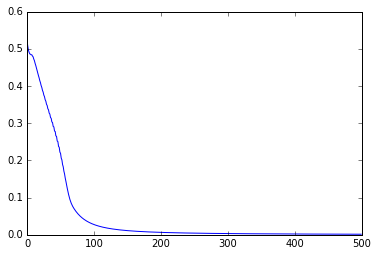

In [12]:
#Same with deeper network
NN = Network([2, 10, 15, 1])
cost = []
it = 500
for i in range(it):
    cost.append(NN.back(X, y, 1.5))
plt.plot(range(it), cost)

[[ 0.02339885]
 [ 0.96923475]
 [ 0.97319402]
 [ 0.02973346]]


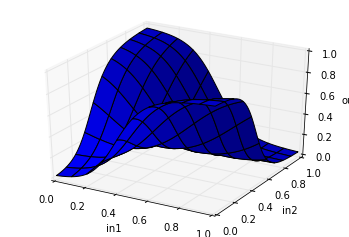

In [13]:
print(NN.forward(X))
#Test network for various combinations:
in1 = np.linspace(0, 1, 100)
in2 = np.linspace(0, 1, 100)

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(in1, in2)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()


allOutputs = NN.forward(allInputs)
yy = np.dot(in1.reshape(100,1), np.ones((1,100)))
xx = np.dot(in1.reshape(100,1), np.ones((1,100))).T

#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, allOutputs.reshape(100, 100))

ax.set_xlabel('in1')
ax.set_ylabel('in2')
ax.set_zlabel('out')